In [361]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from itertools import islice
import collections
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

In [363]:
import pandas as pd  
df =pd.read_csv("IndianFinancialNews.csv")


In [365]:
print(df.info)

<bound method DataFrame.info of        Unnamed: 0                        Date  \
0               0       May 26, 2020, Tuesday   
1               1       May 26, 2020, Tuesday   
2               2        May 25, 2020, Monday   
3               3        May 24, 2020, Sunday   
4               4      May 23, 2020, Saturday   
...           ...                         ...   
49995       49995  February 11, 2003, Tuesday   
49996       49996  February 11, 2003, Tuesday   
49997       49997   February 10, 2003, Monday   
49998       49998   February 10, 2003, Monday   
49999       49999   February 10, 2003, Monday   

                                                   Title  \
0      ATMs to become virtual bank branches, accept d...   
1      IDFC First Bank seniors to forgo 65% of bonus ...   
2      Huge scam in YES Bank for many years, says Enf...   
3      Bank of Maharashtra sanctioned Rs 2,789 cr in ...   
4      DCB Bank's profit before tax declines 37.6% to...   
...                

In [367]:
df.describe()


,Unnamed: 0,Year
count,50000.000000,50000.000000
mean,24999.500000,2010.708100
std,14433.901067,4.536781
min,0.000000,2003.000000
25%,12499.750000,2007.000000
50%,24999.500000,2010.000000
75%,37499.250000,2014.000000
max,49999.000000,2020.000000


In [369]:
df.isna().sum()

Unnamed: 0       0
Date             0
Title            0
Description    710
DayOfWeek        0
Year             0
dtype: int64

In [371]:
df.sort_values(by=['Title'], ascending=False).head(10)

,Unnamed: 0,Date,Title,Description,DayOfWeek,Year
16474,16474,"March 27, 2013, Wednesday",redBus.in being valued at $110 mn,"Fundraising discards traditional benchmarks, d...",Wednesday,2013
18552,18552,"September 27, 2012, Thursday",mChek might have suspended operations: Sources,There is trouble brewing at Bangalore-based mC...,Thursday,2012
47986,47986,"December 18, 2003, Thursday",iGate bags $20mn ING Vysya infotech mandate,iGate Global Solutions has bagged a $20 millio...,Thursday,2003
32275,32275,"March 13, 2009, Friday",iFAST acquires ING Platform Services,"iFAST Corporation, the holding company of iFAS...",Friday,2009
31599,31599,"May 08, 2009, Friday",iFAST Financial rolls out MF distribution plat...,"iFAST Financial India Pvt Ltd, a wholly owned ...",Friday,2009
42205,42205,"January 06, 2006, Friday","i-flex, Wipro to implement Flexcube in LVB",i-flex solutions and Wipro Infotech will imple...,Friday,2006
43821,43821,"May 24, 2005, Tuesday",i-flex picks major stake in Canadian firm,"i-flex solutions ltd, the financial solutions ...",Tuesday,2005
40759,40759,"June 20, 2006, Tuesday",i-flex inks software deal with HSBC,As banks move from a loans-and-deposits model ...,Tuesday,2006
43601,43601,"June 22, 2005, Wednesday",i-flex buys out Belgian firm`s banking software,"i-flex, Mumbai-based maker of core banking sof...",Wednesday,2005
5136,5136,"October 04, 2017, Wednesday",i-banking fee pool jumps 84% in first 9 months,Equity and equity-linked issuance by Indian co...,Wednesday,2017


In [373]:
# Filter the dataframe to display all friday news
df[df['DayOfWeek'] == 'Friday']

,Unnamed: 0,Date,Title,Description,DayOfWeek,Year
6,6,"May 22, 2020, Friday","Retail, MSME loans to get cheaper as RBI cuts ...",HDFC Bank cuts base rate by 55 bps; SBI calls ...,Friday,2020
7,7,"May 22, 2020, Friday","RBI forecasts economic contraction, announces ...",The six-member MPC also kept policy stance unc...,Friday,2020
8,8,"May 22, 2020, Friday","RBI extends loan moratorium till Aug 31, silen...",The central bank has increased group exposure ...,Friday,2020
9,9,"May 22, 2020, Friday","Govt seeks to raise Rs 14,000 cr from second t...",Two new series will have maturities of April 2...,Friday,2020
10,10,"May 22, 2020, Friday",Covid-19 crisis: Slippages may jump to Rs 5.5 ...,Credit costs could touch Rs 2.7 trillion,Friday,2020
...,...,...,...,...,...,...
49972,49972,"February 14, 2003, Friday","Psu Banks & #8217; Gilt Portfolios See Rs 20,0...","Psu Banks & #8217; Gilt Portfolios See Rs 20,0...",Friday,2003
49973,49973,"February 14, 2003, Friday",Pf Body Asks Idbi About Safety Of Investments,Pf Body Asks Idbi About Safety Of Investments,Friday,2003
49974,49974,"February 14, 2003, Friday",Urban Coop Body Moots Fund To Revive Ucbs,Urban Coop Body Moots Fund To Revive Ucbs,Friday,2003
49975,49975,"February 14, 2003, Friday","Non-Gulf Nris Play Bigger Role, Says Hsbc Offi...","Non-Gulf Nris Play Bigger Role, Says Hsbc Offi...",Friday,2003


In [375]:
# Check data types
print(df.dtypes)

Unnamed: 0      int64
Date           object
Title          object
Description    object
DayOfWeek      object
Year            int64
dtype: object


In [377]:
# Handle missing values (if any)
df = df.fillna(0)  # Example: Fill missing values with 0
print(df)

       Unnamed: 0                        Date  \
0               0       May 26, 2020, Tuesday   
1               1       May 26, 2020, Tuesday   
2               2        May 25, 2020, Monday   
3               3        May 24, 2020, Sunday   
4               4      May 23, 2020, Saturday   
...           ...                         ...   
49995       49995  February 11, 2003, Tuesday   
49996       49996  February 11, 2003, Tuesday   
49997       49997   February 10, 2003, Monday   
49998       49998   February 10, 2003, Monday   
49999       49999   February 10, 2003, Monday   

                                                   Title  \
0      ATMs to become virtual bank branches, accept d...   
1      IDFC First Bank seniors to forgo 65% of bonus ...   
2      Huge scam in YES Bank for many years, says Enf...   
3      Bank of Maharashtra sanctioned Rs 2,789 cr in ...   
4      DCB Bank's profit before tax declines 37.6% to...   
...                                                

In [389]:
# Drop unnecessary columns (if any)
print(df.drop(columns=['Description']))
# Example: Drop the first unnamed column


       Unnamed: 0                        Date  \
0               0       May 26, 2020, Tuesday   
1               1       May 26, 2020, Tuesday   
2               2        May 25, 2020, Monday   
3               3        May 24, 2020, Sunday   
4               4      May 23, 2020, Saturday   
...           ...                         ...   
49995       49995  February 11, 2003, Tuesday   
49996       49996  February 11, 2003, Tuesday   
49997       49997   February 10, 2003, Monday   
49998       49998   February 10, 2003, Monday   
49999       49999   February 10, 2003, Monday   

                                                   Title DayOfWeek  Year  
0      ATMs to become virtual bank branches, accept d...   Tuesday  2020  
1      IDFC First Bank seniors to forgo 65% of bonus ...   Tuesday  2020  
2      Huge scam in YES Bank for many years, says Enf...    Monday  2020  
3      Bank of Maharashtra sanctioned Rs 2,789 cr in ...    Sunday  2020  
4      DCB Bank's profit before tax 

In [391]:
# Convert data types if necessary
df['Year'] = df['Year'].astype(float)  # Example: Convert year to float

# Inspect the cleaned dataset
print(df.head())

   Unnamed: 0                    Date  \
0           0   May 26, 2020, Tuesday   
1           1   May 26, 2020, Tuesday   
2           2    May 25, 2020, Monday   
3           3    May 24, 2020, Sunday   
4           4  May 23, 2020, Saturday   

                                               Title  \
0  ATMs to become virtual bank branches, accept d...   
1  IDFC First Bank seniors to forgo 65% of bonus ...   
2  Huge scam in YES Bank for many years, says Enf...   
3  Bank of Maharashtra sanctioned Rs 2,789 cr in ...   
4  DCB Bank's profit before tax declines 37.6% to...   

                                         Description DayOfWeek    Year  
0  Close to 14.6 per cent (or 35,000) of the 240,...   Tuesday  2020.0  
1  V Vaidyanathan, managing director and chief ex...   Tuesday  2020.0  
2  Rana Kapoor's wife also charged with abetting ...    Monday  2020.0  
3  The bank said it was now gearing up to extend ...    Sunday  2020.0  
4  Net profit for the financial year ended March ..

In [393]:
# Basic statistics
print(df.describe())

         Unnamed: 0          Year
count  50000.000000  50000.000000
mean   24999.500000   2010.708100
std    14433.901067      4.536781
min        0.000000   2003.000000
25%    12499.750000   2007.000000
50%    24999.500000   2010.000000
75%    37499.250000   2014.000000
max    49999.000000   2020.000000


In [550]:
# Distribution of Date
print("Distribution of Date")
print(df['Date'].value_counts())

Distribution of Date
Date
2005-04-29    43
2007-04-25    43
2003-04-30    41
2020-03-06    37
2012-07-31    36
              ..
2018-08-16     1
2003-11-27     1
2018-07-22     1
2003-12-07     1
2006-03-12     1
Name: count, Length: 6023, dtype: int64


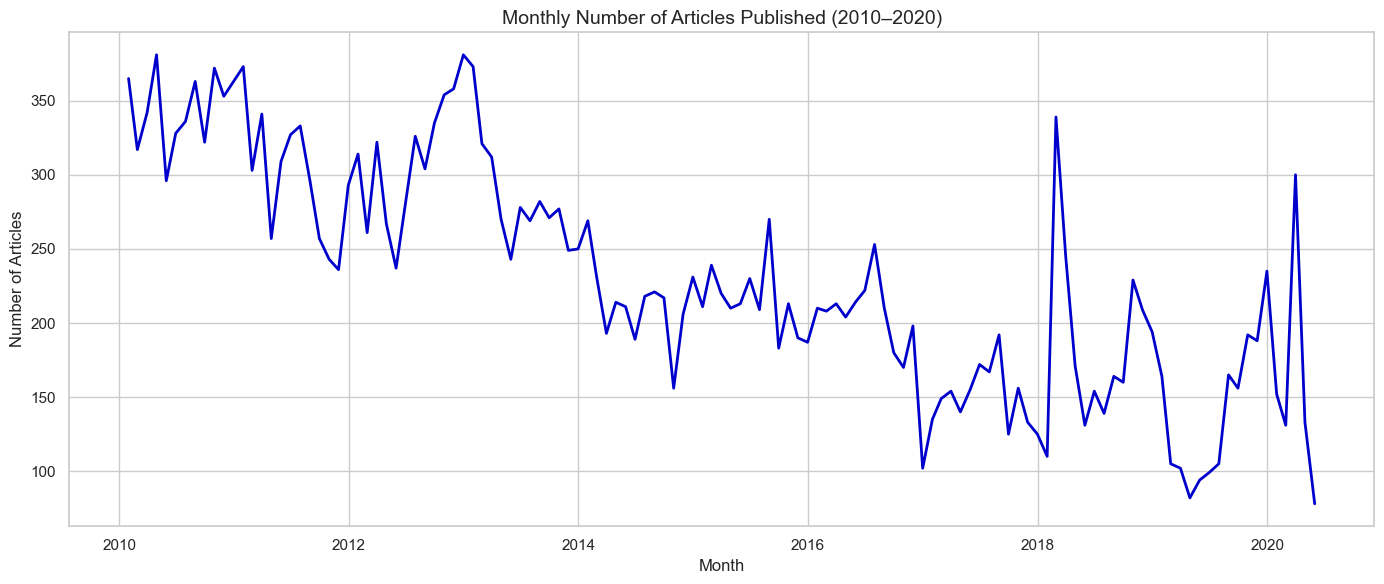

In [461]:
# Filter from 2010 to 2020
df = df[(df["Date"].dt.year >= 2010) & (df["Date"].dt.year <= 2020)]

# Resample by month and count articles
monthly_counts = df.set_index("Date").resample("M").size().reset_index(name="ArticleCount")

# Plot
plt.figure(figsize=(14, 6))
plt.plot(monthly_counts["Date"], monthly_counts["ArticleCount"], color='mediumblue', linewidth=2)

plt.title("Monthly Number of Articles Published (2010–2020)", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Number of Articles")
plt.grid(True)
plt.tight_layout()
plt.show()

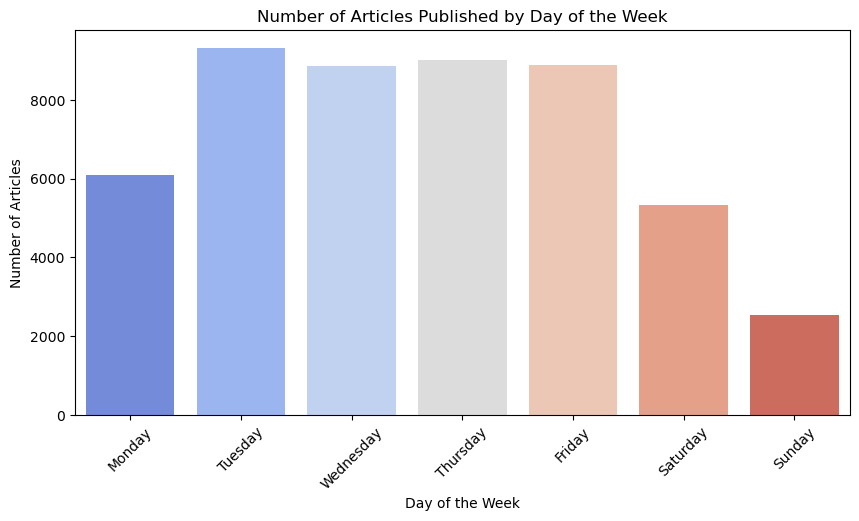

In [401]:
# Article Count by Day of the Week
plt.figure(figsize=(10, 5))
sns.countplot(x=df['DayOfWeek'], order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='coolwarm')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Articles')
plt.title('Number of Articles Published by Day of the Week')
plt.xticks(rotation=45)
plt.show()


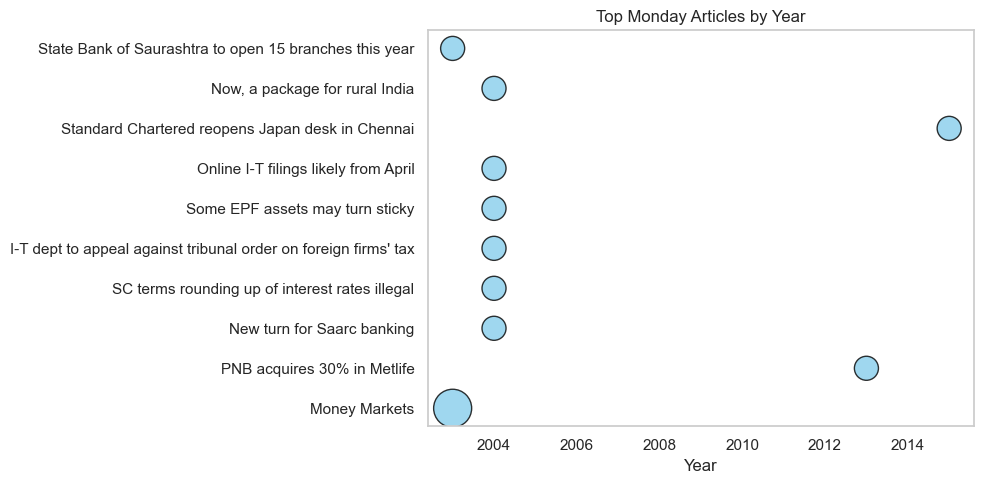

In [546]:

# Group by Year and Title
monday_counts = df_monday.groupby(["Year", "Title"]).size().reset_index(name="Count")

# Get top 10 titles overall
top_titles = monday_counts.groupby("Title")["Count"].sum().sort_values(ascending=False).head(10).index
monday_top = monday_counts[monday_counts["Title"].isin(top_titles)]

# Map titles to numeric values
title_map = {title: i for i, title in enumerate(top_titles)}
monday_top["TitleNum"] = monday_top["Title"].map(title_map)

# Plot
plt.figure(figsize=(10, 5))  # Smaller chart
plt.scatter(
    x=monday_top["Year"],
    y=monday_top["TitleNum"],
    s=monday_top["Count"] * 150,  # Very big bubbles
    alpha=0.8,
    c="skyblue",
    edgecolors="black"
)

# Y-axis labels
plt.yticks(range(len(top_titles)), top_titles)
plt.xlabel("Year")
plt.ylabel("")
plt.title("Top Monday Articles by Year")

plt.grid(False)  # Remove grid
plt.tight_layout()
plt.show()


Text(0, 0.5, 'Article Count')

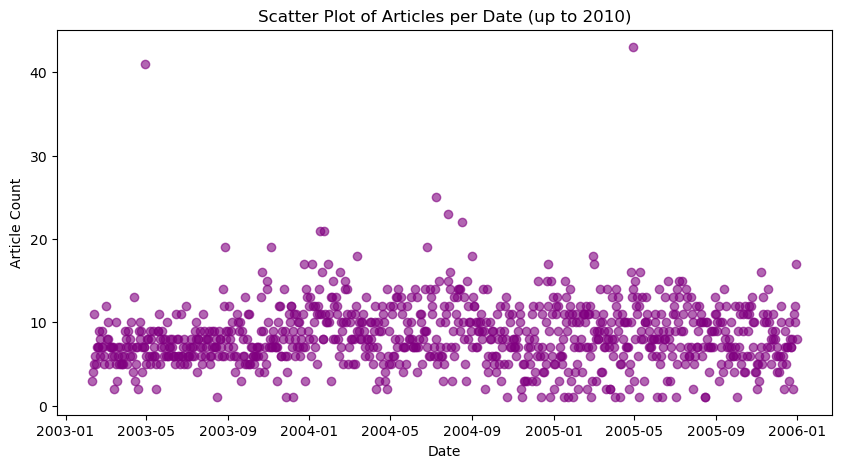

In [431]:
# Ensure 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Filter data to include only dates up to 2010
df_filtered = df[df['Date'].dt.year <= 2005]

# Count articles per day
daily_counts = df_filtered['Date'].value_counts().reset_index()
daily_counts.columns = ['Date', 'ArticleCount']
daily_counts = daily_counts.sort_values('Date')

# Scatter plot
plt.figure(figsize=(10, 5))
plt.scatter(daily_counts['Date'], daily_counts['ArticleCount'], alpha=0.6, color='purple')
plt.title('Scatter Plot of Articles per Date (up to 2010)')
plt.xlabel('Date')
plt.ylabel('Article Count')

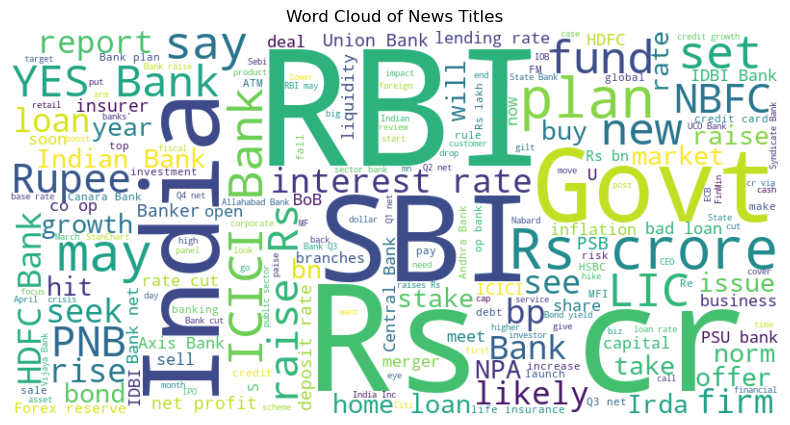

In [406]:
# Generate Word Cloud for Titles
titles = ' '.join(df['Title'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(titles)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of News Titles')
plt.show()

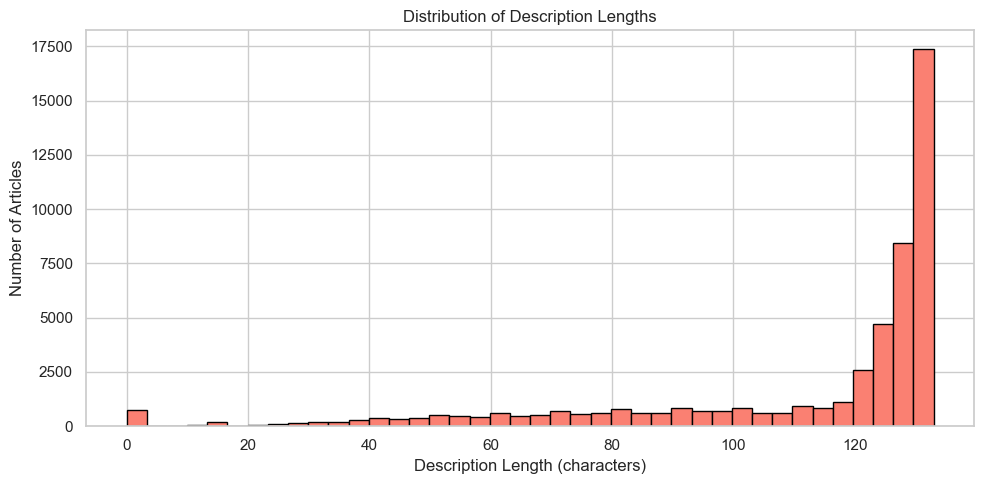

In [483]:
df["DescriptionLength"] = df["Description"].fillna("").apply(len)

plt.figure(figsize=(10, 5))
plt.hist(df["DescriptionLength"], bins=40, color='salmon', edgecolor='black')

plt.title("Distribution of Description Lengths")
plt.xlabel("Description Length (characters)")
plt.ylabel("Number of Articles")
plt.grid(True)
plt.tight_layout()342 v                                                                     vbb
plt.show()


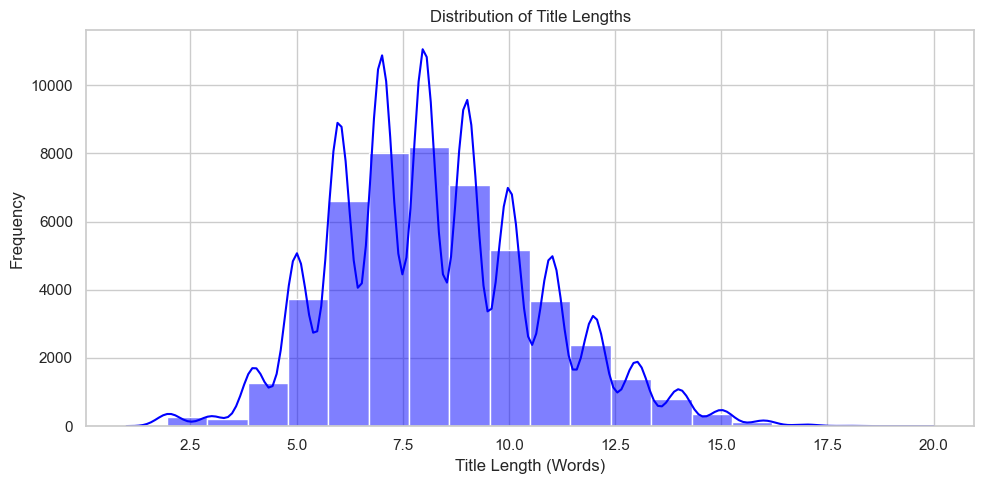

In [535]:
# Article Length Distribution
df['TitleLength'] = df['Title'].dropna().apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 5))
sns.histplot(df['TitleLength'], bins=20, kde=True, color='blue')
plt.xlabel('Title Length (Words)')
plt.ylabel('Frequency')
plt.title('Distribution of Title Lengths')
plt.tight_layout()
plt.show()

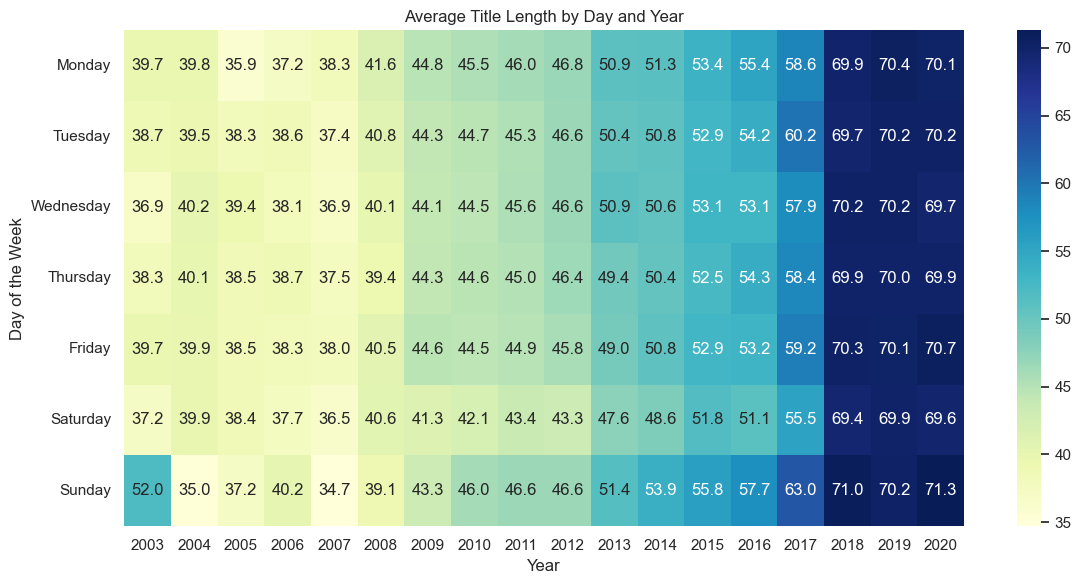

In [479]:
# Create TitleLength column
df["TitleLength"] = df["Title"].fillna("").apply(len)

# Create pivot table
heatmap_data = df.pivot_table(index="DayOfWeek", columns="Year", values="TitleLength", aggfunc="mean")

# Reorder days
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
heatmap_data = heatmap_data.reindex(order)

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Average Title Length by Day and Year")
plt.xlabel("Year")
plt.ylabel("Day of the Week")
plt.tight_layout()
plt.show()

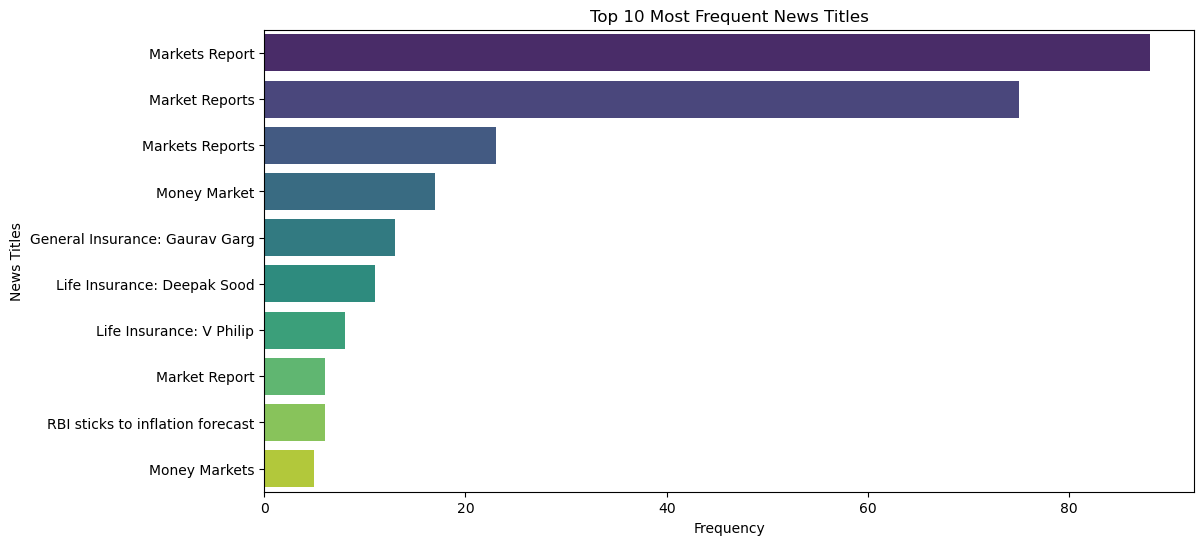

In [411]:
# Bar Graph: Top 10 News Titles by Frequency
top_titles = df['Title'].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_titles.values, y=top_titles.index, palette='viridis')
plt.xlabel('Frequency')
plt.ylabel('News Titles')
plt.title('Top 10 Most Frequent News Titles')
plt.show()



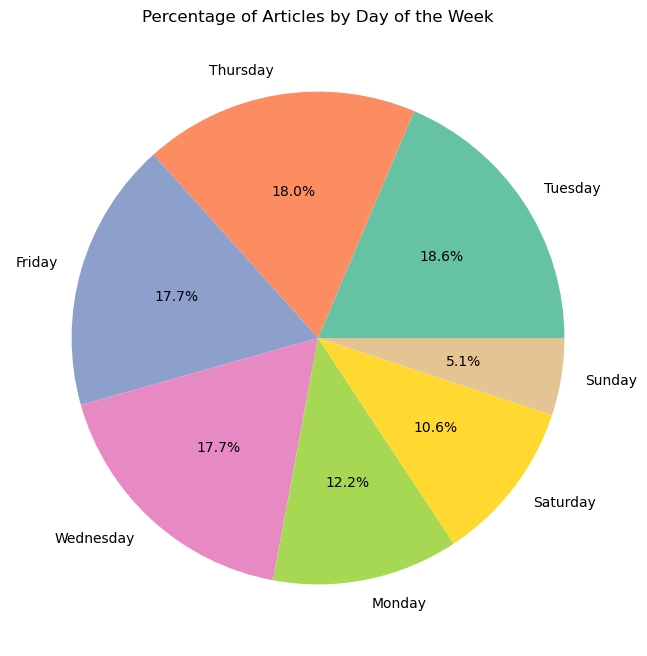

In [309]:
# Pie Chart: Articles per Day of the Week
plt.figure(figsize=(8, 8))
df['DayOfWeek'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('Set2', 7))
plt.ylabel('')
plt.title('Percentage of Articles by Day of the Week')
plt.show()

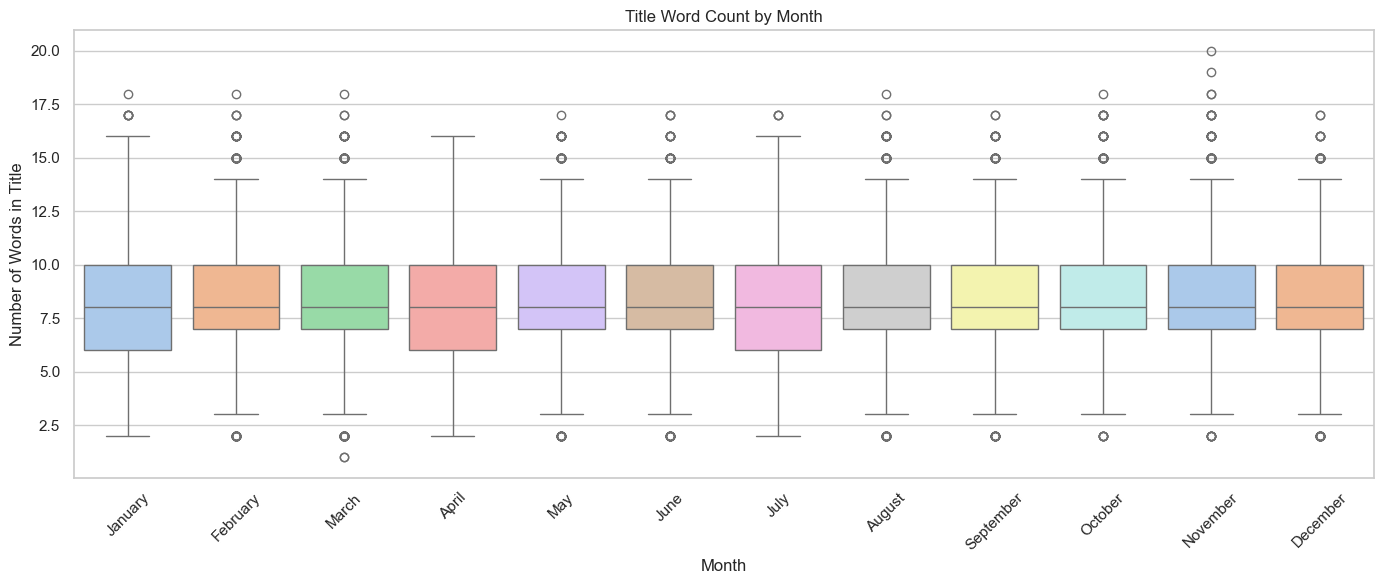

In [548]:

# Add features
df["Month"] = df["Date"].dt.month_name()
df["TitleWordCount"] = df["Title"].fillna("").apply(lambda x: len(x.split()))

# Plot
order = ["January", "February", "March", "April", "May", "June",
         "July", "August", "September", "October", "November", "December"]

plt.figure(figsize=(14, 6))
sns.boxplot(x="Month", y="TitleWordCount", data=df, order=order, palette="pastel")

plt.title("Title Word Count by Month")
plt.xlabel("Month")
plt.ylabel("Number of Words in Title")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Top 10 Most Frequent Titles:
Title
Markets Report                      88
Market Reports                      75
Markets Reports                     23
Money Market                        17
General Insurance: Gaurav Garg      13
Life Insurance: Deepak Sood         11
Life Insurance: V Philip             8
Market Report                        6
RBI sticks to inflation forecast     6
Money Markets                        5
Name: count, dtype: int64


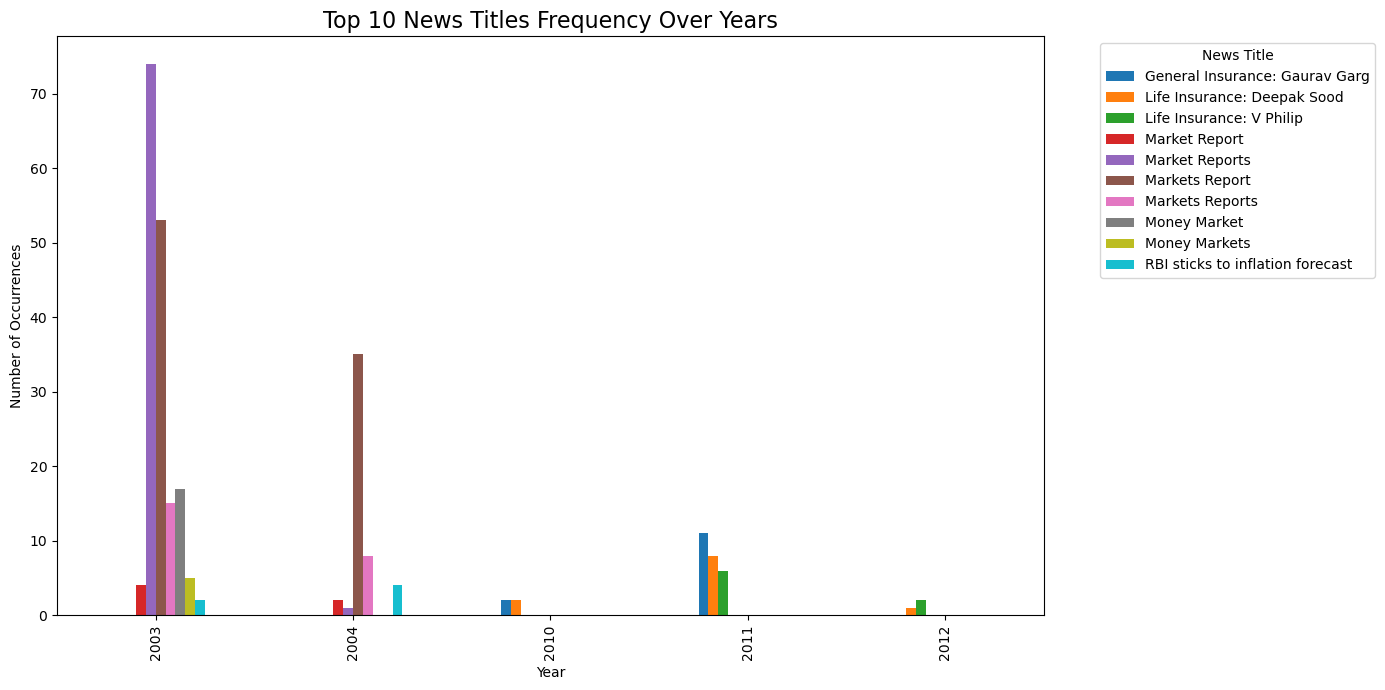

In [315]:

# Drop rows with missing Title or Year
df = df.dropna(subset=['Title', 'Year'])

# Step 1: Count the most frequent titles
top_titles = df['Title'].value_counts().head(10)
print("Top 10 Most Frequent Titles:")
print(top_titles)

# Step 2: Filter the original DataFrame for only these top titles
filtered_df = df[df['Title'].isin(top_titles.index)]

# Step 3: Group by Year and Title to count appearances
grouped = filtered_df.groupby(['Year', 'Title']).size().unstack(fill_value=0)

# Step 4: Plot
grouped.plot(kind='bar', figsize=(14, 7))
plt.title("Top 10 News Titles Frequency Over Years", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Number of Occurrences")
plt.legend(title="News Title", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


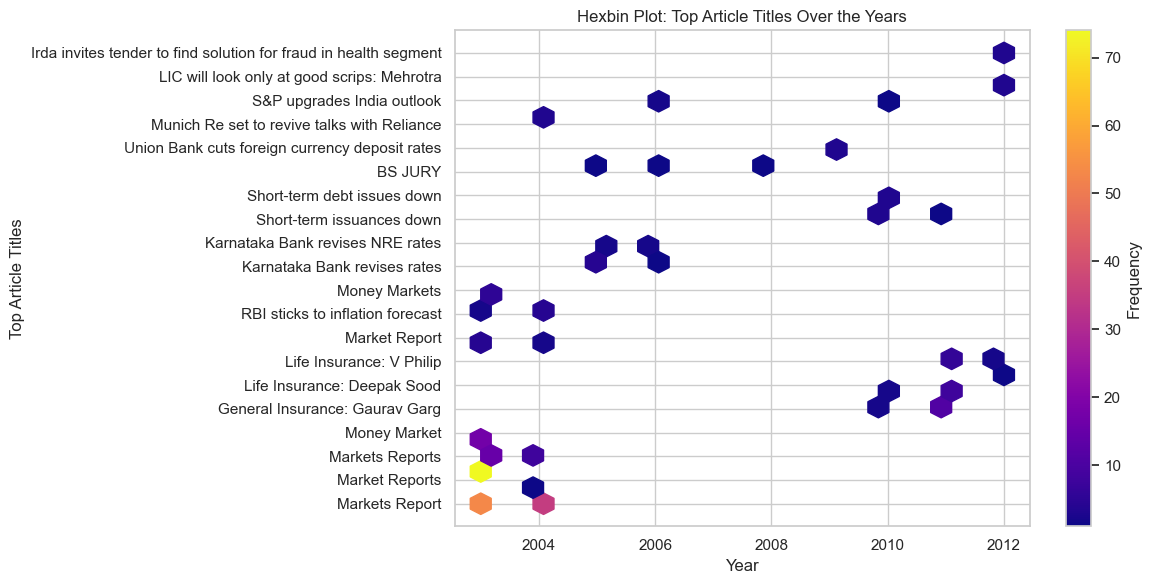

In [511]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and prepare data
df = pd.read_csv("IndianFinancialNews.csv")
df["Date"] = pd.to_datetime(df["Date"], errors='coerce')
df = df.dropna(subset=["Date", "Title"])
df["Year"] = df["Date"].dt.year

# Get top N titles overall
top_titles = df["Title"].value_counts().head(20).index
df_top = df[df["Title"].isin(top_titles)]

# Map titles to numbers
title_to_num = {title: i for i, title in enumerate(top_titles)}
df_top["TitleNum"] = df_top["Title"].map(title_to_num)

# Plot hexbin
plt.figure(figsize=(12, 6))
plt.hexbin(df_top["Year"], df_top["TitleNum"], gridsize=25, cmap='plasma', mincnt=1)
plt.colorbar(label="Frequency")

# Set y-axis labels as titles
plt.yticks(ticks=range(len(top_titles)), labels=top_titles)
plt.xlabel("Year")
plt.ylabel("Top Article Titles")
plt.title("Hexbin Plot: Top Article Titles Over the Years")
plt.tight_layout()
plt.show()


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Monday'),
  Text(1, 0, 'Tuesday'),
  Text(2, 0, 'Wednesday'),
  Text(3, 0, 'Thursday'),
  Text(4, 0, 'Friday'),
  Text(5, 0, 'Saturday'),
  Text(6, 0, 'Sunday')])

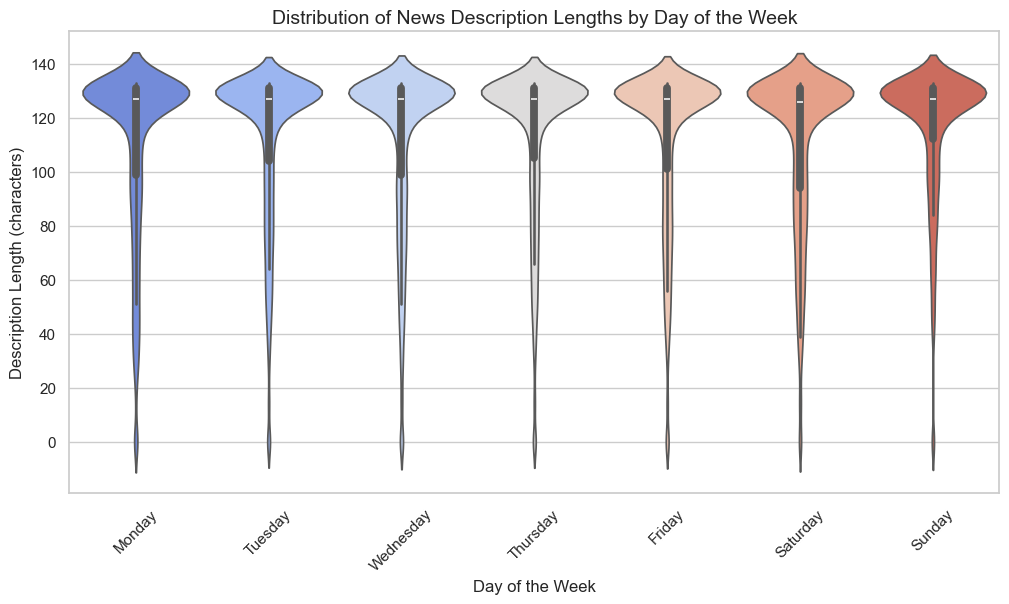

In [513]:
df["Description"] = df["Description"].fillna("")

# Create a new column for the length of the description
df["DescriptionLength"] = df["Description"].apply(len)

# Set the figure size and style
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Create the violin plot
sns.violinplot(
    x="DayOfWeek",
    y="DescriptionLength",
    data=df,
    order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"],palette='coolwarm'
)

# Add labels and title
plt.title("Distribution of News Description Lengths by Day of the Week", fontsize=14)
plt.xlabel("Day of the Week")
plt.ylabel("Description Length (characters)")
plt.xticks(rotation=45)

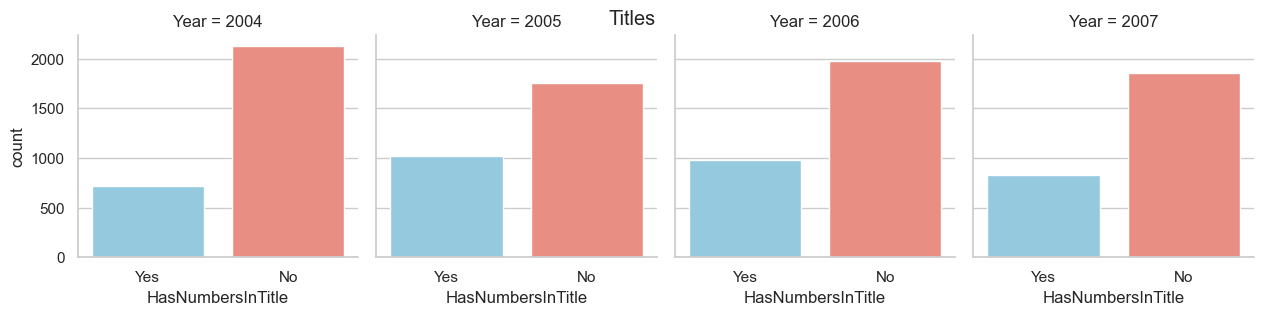

In [531]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

# Load data
df = pd.read_csv("IndianFinancialNews.csv")
df["Date"] = pd.to_datetime(df["Date"], errors='coerce')
df = df.dropna(subset=["Date", "Title"])

# Create columns
df["Year"] = df["Date"].dt.year
df["HasNumbersInTitle"] = df["Title"].apply(lambda x: bool(re.search(r'\d', str(x))))
df["HasNumbersInTitle"] = df["HasNumbersInTitle"].map({True: "Yes", False: "No"})
df = df[df["Year"].between(2004, 2007)]

# FacetGrid with custom colors
g = sns.FacetGrid(df, col="Year", col_wrap=4, height=3.2)
g.map(sns.countplot, "HasNumbersInTitle", order=["Yes", "No"], palette=["skyblue", "salmon"])

g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Titles")
plt.show()
